<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Описание проекта

Цель: - Подготовить модель машинного обучения для предскаазания коэффициента восстановления золота из золотосодержащей руды. Доступны данные с параметрами добычи и очистки. Модель необходима для оптимизации производства.

Задачи:

    Подготовить данные;
    
    Провести исследовательский анализ данных;
    
    Построить и обучить модель.

Описание данных

    Наименование признаков:
[этап].[тип_параметра].[название_параметра]
* Пример: rougher.input.feed_ag
* Возможные значения для блока [этап]:
    * rougher — флотация
    * primary_cleaner — первичная очистка
    * secondary_cleaner — вторичная очистка
    * final — финальные характеристики
* Возможные значения для блока [тип_параметра]:
    *   input — параметры сырья
    *   output — параметры продукта
    *   state — параметры, характеризующие текущее состояние этапа
    *   calculation — расчётные характеристики
* Параметры этапов:
    * air amount — объём воздуха
    * fluid levels — уровень жидкости
    * feed size — размер гранул сырья
    * feed rate — скорость подачи

План выполнения работы:

* Подготовка Данных
    * Изучение данных
    * Проверка расчётов эффективности обогащения
    * Анализ признаков, недоступных в тестовой выборке
Предобработка данных
* Анализ данных
    * Анализ изменения концентрации металлов (Au, Ag, Pb)
    * Сравнение распределений размеров гранул сырья
    * Исследование суммарных концентраций веществ
* Модель
    * Функция итоговой sMAPE
    * Обучение и оценка качества моделей
    * Тестирование модели
* Общий вывод

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.pipeline import  make_pipeline
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
test_frame = pd.read_csv('/datasets/gold_recovery_test.csv')
train_frame = pd.read_csv('/datasets/gold_recovery_train.csv')
full_frame = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
train_frame = train_frame.replace(float("-inf"),np.nan)
test_frame = test_frame.replace(float("-inf"),np.nan)

In [4]:
train_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [6]:
full_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [7]:
train_frame.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [8]:
test_frame.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [9]:
full_frame.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


###### Проверим корректность расчета параметра recovery

In [10]:
def apply_recovery(row):
    (input_au,
     output_au,
     output_tail) = (row["rougher.input.feed_au"],
                     row["rougher.output.concentrate_au"],
                     row["rougher.output.tail_au"])
    recovery_metric = (((output_au) * ((input_au) - (output_tail)))/
                       (((input_au) * ((output_au) - (output_tail))))) * 100
    return recovery_metric

In [11]:
test = train_frame.dropna(subset = ["rougher.input.feed_au",
                                    "rougher.output.concentrate_au",
                                    "rougher.output.tail_au",
                                    "rougher.output.recovery"],axis = 0).apply(
                                                                        apply_recovery,axis = 1)

In [12]:
MAE(train_frame.dropna(subset = ["rougher.input.feed_au",
                                    "rougher.output.concentrate_au",
                                    "rougher.output.tail_au",
                                    "rougher.output.recovery"])["rougher.output.recovery"],
                       test)

9.444891926100695e-15

###### Найдем все столбцы, которые есть в тренировочной выборке, но нет в тестовой

In [13]:
step = collections.Counter()
type_step = collections.Counter()
data = collections.Counter()
list_columns = [i for i in train_frame.columns if i not in test_frame.columns]
for i in list_columns:
    words = list(map(str,i.split(".")))
    step[words[0]] += 1
    type_step[words[1]] += 1
    data[words[2]] += 1

In [14]:
list_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Более подробно изучим найденные столбцы

In [15]:
step,"\n",type_step,"\n",data

(Counter({'final': 9,
          'primary_cleaner': 8,
          'rougher': 13,
          'secondary_cleaner': 4}),
 '\n',
 Counter({'output': 30, 'calculation': 4}),
 '\n',
 Counter({'concentrate_ag': 3,
          'concentrate_pb': 3,
          'concentrate_sol': 3,
          'concentrate_au': 3,
          'recovery': 2,
          'tail_ag': 4,
          'tail_pb': 4,
          'tail_sol': 4,
          'tail_au': 4,
          'sulfate_to_au_concentrate': 1,
          'floatbank10_sulfate_to_au_feed': 1,
          'floatbank11_sulfate_to_au_feed': 1,
          'au_pb_ratio': 1}))

###### Вывод

Заметим, что из 34 пропущенных признака 30 относятся к параметрам продукта и только 4 к расчетным характеристикам

9 пропущенных признаков этапа final, 8 primary_cleaner, 9 rougher, 4 secondary_cleaner относятся к параметрам продукта
4 пропущенных признака этапа rougher относятся к расчетным характеристикам
На всех этапах отсутствует информация о хвостовых частях
Во всех этапах, кроме повторной очистки отсутствует информация о доле металлов
У финального этапа и этапа флотации отсутствуют признаки обогащения
Так же отсутствуют данные о некоторых реагентах на этапе флотации

###### Проверим возможность восстановления параметра recovery

In [16]:
train_frame = train_frame.dropna(subset=["rougher.output.recovery","final.output.recovery"],axis = 0)

###### Обработаем пропуски

In [20]:
!pip install -U sklearn

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=e060478c2970a1acab4768afe4937ccc4925acf1aea0c50607fdbdf6a462edeb
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer()
without_nan = pd.DataFrame(data = imputer.fit_transform(train_frame.drop(['date'],axis = 1)),
             columns= train_frame.drop(['date'],axis = 1).columns,
             index = train_frame.index)

In [ ]:
test_frame = test_frame.dropna(subset= ['date'],axis = 0)

In [22]:
test_frame_for_target = test_frame.merge(full_frame.loc[:,['date',"rougher.output.recovery","final.output.recovery"]],on = 'date')

In [23]:
test_frame_for_target = test_frame_for_target.dropna(subset=["rougher.output.recovery","final.output.recovery"],axis = 0)

In [24]:
test_frame = test_frame_for_target.loc[:,test_frame.columns]

In [25]:
target_test_rougher = test_frame_for_target["rougher.output.recovery"]
target_test_final = test_frame_for_target["final.output.recovery"]

In [26]:
test_frame = test_frame.drop("date",axis =1)

In [ ]:
imputer_test = KNNImputer()
test_without_nan = pd.DataFrame(data = imputer_test.fit_transform(test_frame),
             columns= test_frame.columns,
             index = test_frame.index)

## Анализ данных

Расчет концентрации металлов на разных этапах

In [25]:
print("Концентрация до флотации")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(without_nan["rougher.input.feed_ag"].mean(),
without_nan["rougher.input.feed_pb"].mean(),
without_nan["rougher.input.feed_au"].mean()))
print()
print("Концентрация после флотации")
print("Коцентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(without_nan["rougher.output.concentrate_ag"].mean(),
without_nan["rougher.output.concentrate_pb"].mean(),
without_nan["rougher.output.concentrate_au"].mean()))
print()
print("Концентрация после первичной очистки")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(without_nan["primary_cleaner.output.concentrate_ag"].mean(),
without_nan["primary_cleaner.output.concentrate_pb"].mean(),
without_nan["primary_cleaner.output.concentrate_au"].mean()))
print()
print("Концентрация поле вторичной очистки")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(without_nan["final.output.concentrate_ag"].mean(),
without_nan["final.output.concentrate_pb"].mean(),
without_nan["final.output.concentrate_au"].mean()))

Концентрация до флотации
Концентрация Серебра: 8.58,Свинца: 3.52,Золота: 7.87

Концентрация после флотации
Коцентрация Серебра: 11.78,Свинца: 7.66,Золота: 19.44

Концентрация после первичной очистки
Концентрация Серебра: 8.20,Свинца: 9.58,Золота: 32.39

Концентрация поле вторичной очистки
Концентрация Серебра: 5.14,Свинца: 10.13,Золота: 44.00


По представленным выше данным отчетливо видно, что с каждым этапом увеличивается концентрация золота и свинца, так же можно заметить уменьшение концентрации серебра

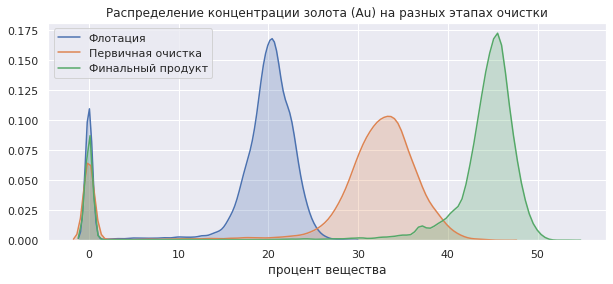

###### График распределения размера гранул

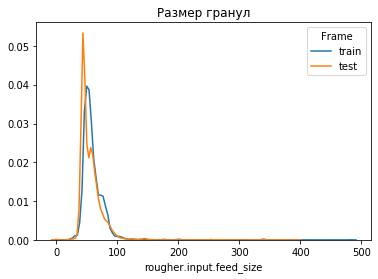

In [26]:
for frame,name in zip([without_nan,test_without_nan],
                       ["train","test"]):
    subset = frame["rougher.input.feed_size"]

    sns.distplot(subset, hist = False, kde = True,
                 label = name)
plt.legend(prop={'size': 10}, title = 'Frame')
plt.title('Размер гранул');

Мы можем видеть, что распределения немного отличаются. В тренировочной выборке преобладают значения около порога 50 и выше, в то же время как в тестовой выборке достаточно большое количество объектов сконцентрированы до порога 50. Так же это заметно и на средних значениях, среднее значение тренировочной выборки на 3 пункта больше среднего по тестовой выборке

###### Расчет суммарной концентрации

In [27]:
def summary_of_concentarution(row):
    list_of_steps = ["rougher","primary_cleaner","final"]
    input_feed_au = row["rougher.input.feed_au"]
    input_feed_ag = row["rougher.input.feed_ag"]
    input_feed_pb = row["rougher.input.feed_pb"]
    input_feed_sol = row["rougher.input.feed_sol"]
    out_rougher = []
    out_primary_cleaner = []
    out_final = []
    list_of_arrays =[out_rougher,out_primary_cleaner,out_final]
    for step,array in zip(list_of_steps,list_of_arrays):
        array.append(row[step+".output.concentrate_au"])
        array.append(row[step+".output.concentrate_ag"])
        array.append(row[step+".output.concentrate_pb"])
        array.append(row[step+".output.concentrate_sol"])
    sum_before_steps = input_feed_ag+input_feed_au+input_feed_pb+input_feed_sol
    sum_rougher = sum(out_rougher)
    sum_primary = sum(out_primary_cleaner)
    sum_final = sum(out_final)
    return pd.Series([sum_before_steps,sum_rougher,sum_primary,sum_final])

In [28]:
sum_values = without_nan.apply(summary_of_concentarution,axis = 1)
sum_values.columns = ["before_rougher","rougher","primary_cleaner","final"]

In [29]:
sum_values

,before_rougher,rougher,primary_cleaner,final
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
16855,53.415050,70.781325,59.001692,68.098589
16856,53.696482,70.539603,59.703912,68.274362
16857,54.589604,55.376330,59.561096,68.226068
16858,54.027355,69.201689,57.216686,68.200449


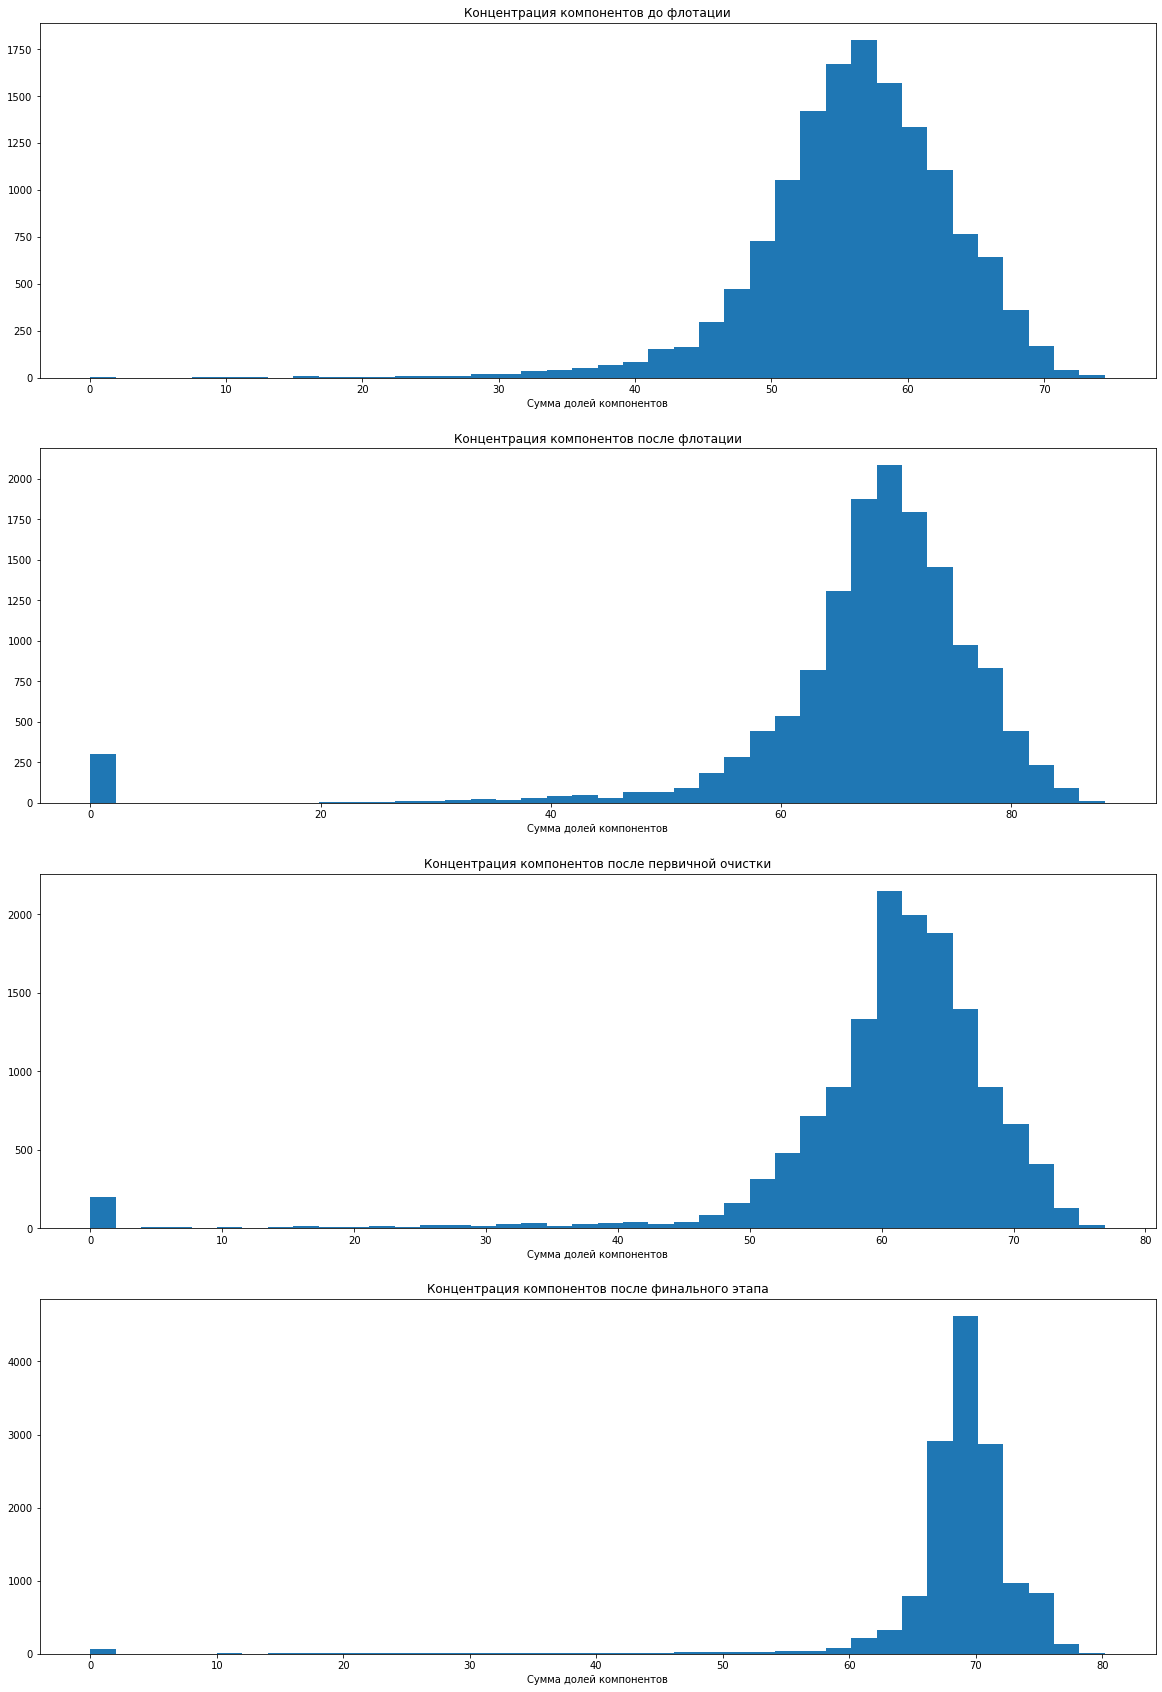

In [30]:
fig,ax = plt.subplots(4,1,figsize = (20,30))

ax[0].hist(sum_values["before_rougher"],bins = 40)
ax[1].hist(sum_values["rougher"],bins = 40)
ax[2].hist(sum_values["primary_cleaner"],bins = 40)
ax[3].hist(sum_values["final"],bins = 40)
ax[0].set_xlabel("Сумма долей компонентов")
ax[1].set_xlabel("Сумма долей компонентов")
ax[2].set_xlabel("Сумма долей компонентов")
ax[3].set_xlabel("Сумма долей компонентов")
ax[0].set_title("Концентрация компонентов до флотации")
ax[1].set_title("Концентрация компонентов после флотации")
ax[2].set_title("Концентрация компонентов после первичной очистки")
ax[3].set_title("Концентрация компонентов после финального этапа")
plt.show()

Можно заметить, что во всех распределениях присутствует пик около нулевого значения. Он очень далек от общего распределения, его следует удалить. Так же это стоит проделать и в тестовой выборке, так они носят характер выбросов

###### Удаление выбросов

In [31]:
without_nan = without_nan.drop(index = without_nan[without_nan["rougher.input.feed_au"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["rougher.input.feed_ag"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["rougher.input.feed_pb"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["rougher.input.feed_sol"] < 1].index,
                               axis = 0)


without_nan = without_nan.drop(index = without_nan[without_nan["rougher.output.concentrate_au"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["rougher.output.concentrate_ag"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["rougher.output.concentrate_pb"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["rougher.output.concentrate_sol"] < 1].index,
                               axis = 0)

without_nan = without_nan.drop(index = without_nan[without_nan["primary_cleaner.output.concentrate_au"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["primary_cleaner.output.concentrate_ag"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["primary_cleaner.output.concentrate_pb"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["primary_cleaner.output.concentrate_sol"] < 1].index,
                               axis = 0)

without_nan = without_nan.drop(index = without_nan[without_nan["final.output.concentrate_au"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["final.output.concentrate_ag"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["final.output.concentrate_pb"] < 1].index,
                               axis = 0)
without_nan = without_nan.drop(index = without_nan[without_nan["final.output.concentrate_sol"] < 1].index,
                               axis = 0)

###### График суммарной концентрации после удаления выбросов

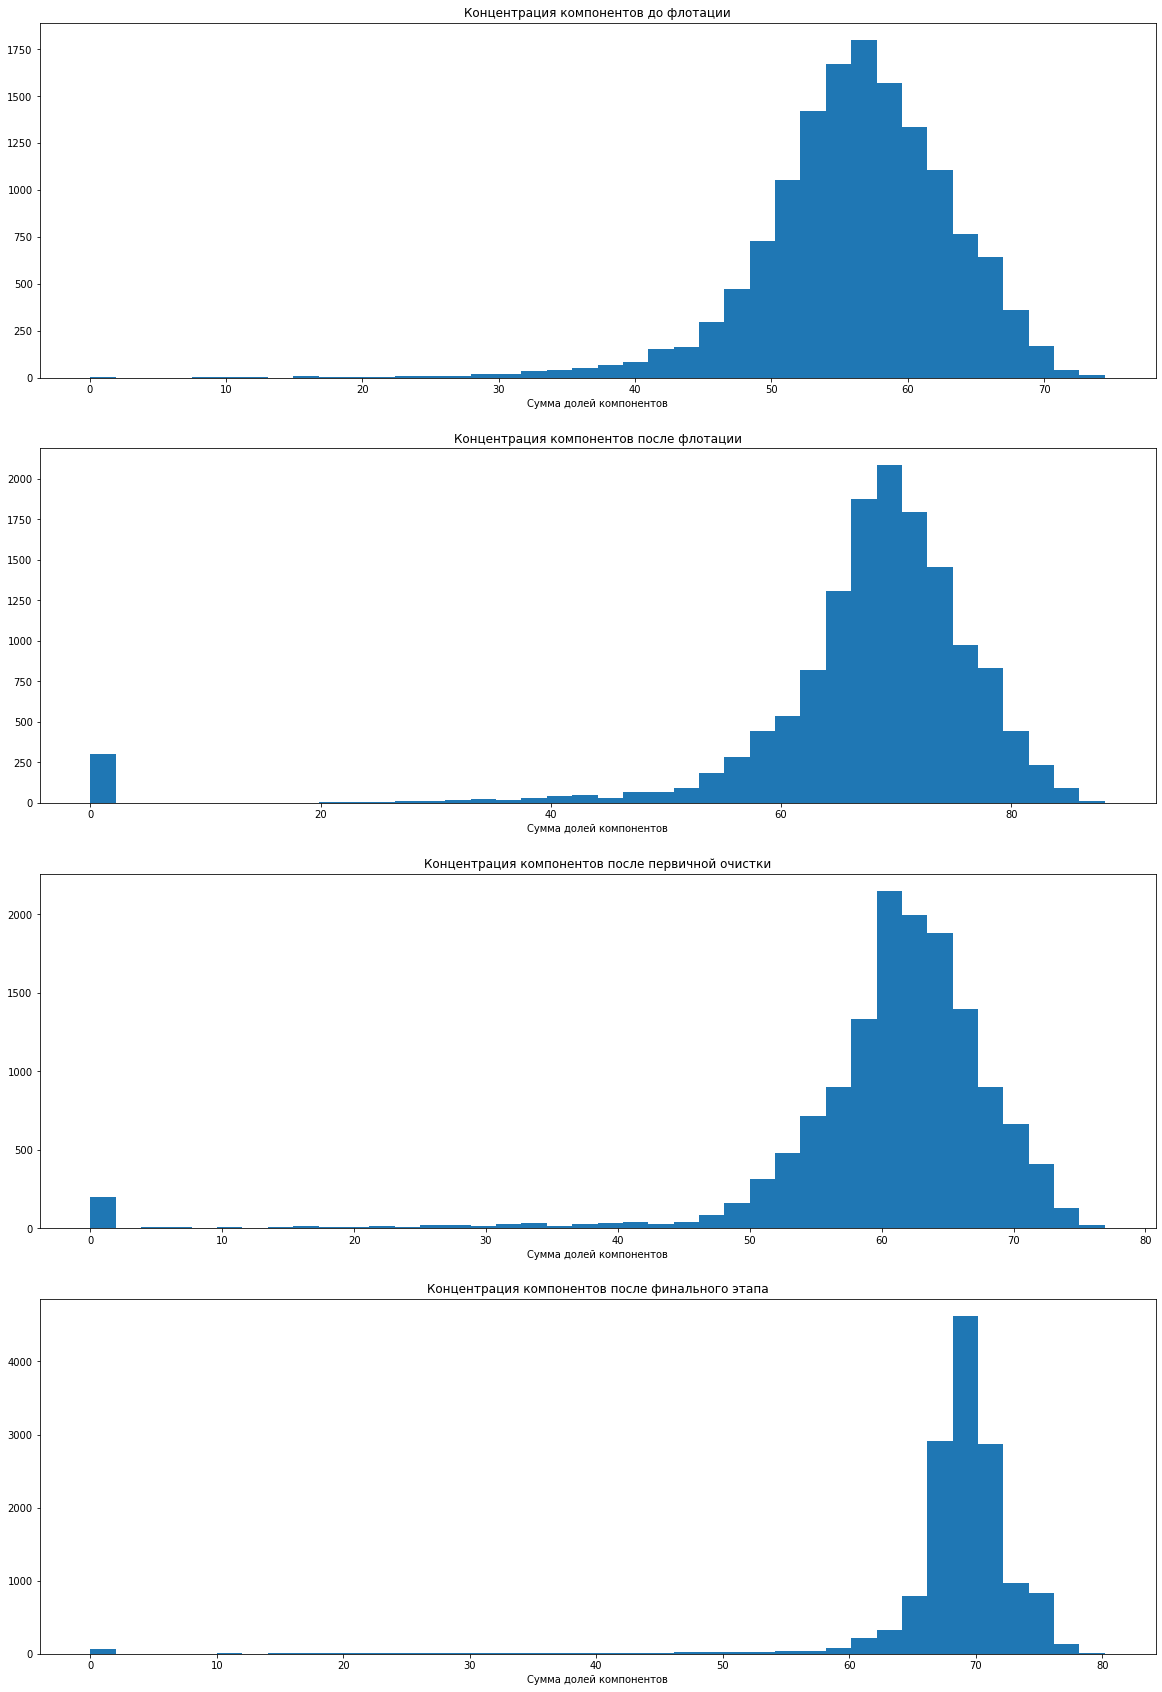

In [55]:
fig,ax = plt.subplots(4,1,figsize = (20,30))

ax[0].hist(sum_values["before_rougher"],bins = 40)
ax[1].hist(sum_values["rougher"],bins = 40)
ax[2].hist(sum_values["primary_cleaner"],bins = 40)
ax[3].hist(sum_values["final"],bins = 40)
ax[0].set_xlabel("Сумма долей компонентов")
ax[1].set_xlabel("Сумма долей компонентов")
ax[2].set_xlabel("Сумма долей компонентов")
ax[3].set_xlabel("Сумма долей компонентов")
ax[0].set_title("Концентрация компонентов до флотации")
ax[1].set_title("Концентрация компонентов после флотации")
ax[2].set_title("Концентрация компонентов после первичной очистки")
ax[3].set_title("Концентрация компонентов после финального этапа")
plt.show()

In [33]:
test_frame = test_frame.drop(index = test_frame[test_frame["rougher.input.feed_au"] < 1].index,
                               axis = 0)
test_frame = test_frame.drop(index = test_frame[test_frame["rougher.input.feed_ag"] < 1].index,
                               axis = 0)
test_frame = test_frame.drop(index = test_frame[test_frame["rougher.input.feed_pb"] < 1].index,
                               axis = 0)
test_frame = test_frame.drop(index = test_frame[test_frame["rougher.input.feed_sol"] < 1].index,
                               axis = 0)

In [34]:
train_features_dataset_rougher = without_nan.loc[:,test_frame.columns]
train_target_dataset_rougher = without_nan['rougher.output.recovery']
train_features_dataset_final = train_features_dataset_rougher 
train_target_dataset_final = without_nan['final.output.recovery']

## Модель

Метрики

In [35]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [36]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [37]:
custom_score = make_scorer(sMAPE,greater_is_better=False)

###### Инициализация pipeline

In [38]:
model = make_pipeline(StandardScaler(),RandomForestRegressor())
model2 = make_pipeline(StandardScaler(),DecisionTreeRegressor())

In [39]:
# Инициализация параметров для GridSearchCV
params_RF = {"randomforestregressor__n_estimators":[5,100],
             "randomforestregressor__max_depth":[1,10]}
params_DT= {"decisiontreeregressor__max_depth":[1,10]}

In [40]:
grid_rougher = GridSearchCV(model,param_grid = params_RF,scoring=custom_score)
grid_final = GridSearchCV(model,param_grid = params_RF,scoring=custom_score)
grid_rougher_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score)
grid_final_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score)

###### Обучение

In [41]:
grid_rougher.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final.fit(train_features_dataset_final,train_target_dataset_final)
grid_rougher_DT.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final_DT.fit(train_features_dataset_final,train_target_dataset_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [1, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [42]:
print("Лучшие модели")
print(grid_rougher.best_estimator_)
print(grid_rougher.best_estimator_)
print(grid_rougher_DT.best_estimator_)
print(grid_final_DT.best_estimator_)

Лучшие модели
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])


In [43]:
best_score_rougher = grid_rougher.best_score_
best_score_final = grid_final.best_score_
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_

Определим лучшую модель для каждого целевого признака

In [44]:
print("rougher")
print("RandomForest",best_score_rougher,"DecisionTree",best_score_rougher_DT)
print("final")
print("RandomForest",best_score_final,"DecisionTree",best_score_final_DT)

rougher
RandomForest -6.5810516690474 DecisionTree -7.962795330896458
final
RandomForest -9.335455839940282 DecisionTree -9.502834455132586


Видно, что лучше всего справляется RandomForest, так что как лучшую модель возьмем именно его

###### Лучшие результаты на тренировочной выборке

Финальный sMAPE рандомного леса

In [45]:
final_sMAPE(best_score_rougher,best_score_final)

-8.646854797217062

Финальный sMAPE решающего дерева

In [46]:
final_sMAPE(best_score_rougher_DT,best_score_final_DT)

-9.117824674073553

Наименьшую ошибку мы получили при использовании рандомного леса

In [47]:
rogher_test = grid_rougher.predict(test_without_nan)

In [48]:
final_test = grid_final.predict(test_without_nan)

###### Финальная ошибка на тестовой выборке

In [49]:
final_sMAPE(sMAPE(target_test_rougher,rogher_test),sMAPE(target_test_final,final_test))

9.135079449994816

###### Инициализируем и обучим константную модель

In [50]:
base = DummyRegressor(strategy="median")
base_final = DummyRegressor(strategy="median")

Предскажем метки

In [51]:
base.fit(train_features_dataset_rougher,train_target_dataset_rougher)
base_final.fit(train_features_dataset_final,train_target_dataset_final)

DummyRegressor(strategy='median')

In [52]:
base_rougher = base.predict(test_without_nan)
base_final_pred = base_final.predict(test_without_nan)

In [53]:
final_sMAPE(sMAPE(target_test_rougher,base_rougher),sMAPE(target_test_final,base_final_pred))

9.44138312943423

Вывод после сравнения результатов, можно сделать следующий. Так как финальная ошибка меньше, полученной с помощью константного алгоритма, считаем ее приемлемой. 

###### Общий вывод

Итоговая модель построена на алгоритме RandomForest
Ошибка на тестовой выборке: 9.15
Параметры алгоритма: { max_depth: 10}
Параметр recovery в тренировочной выборке был рассчитан верно
Изначально, в тестовой выборке отсутствует 34 признака